In [41]:
from tools import getDataset

import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from sklearn.model_selection import train_test_split
from torchvision import models, transforms
from torch.utils.data import DataLoader

In [42]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    print("MPS device not found.")
print('Device:', device)

Device: mps


In [43]:
root_dir = os.path.join(os.getcwd(), 'VD_dataset2')
dataset = getDataset(path=root_dir, shuffle_images=False)

In [44]:
from torch.utils.data import Dataset
from PIL import Image

from dataset import StyleTransferDataset

transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
        ])

train_set, temp_set = train_test_split(dataset, test_size=0.3, random_state=42)
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

train_dataset = StyleTransferDataset(train_set, transform=transform)
val_dataset = StyleTransferDataset(val_set, transform=transform)
test_dataset = StyleTransferDataset(test_set, transform=transform)

batch_size = 64
num_workers = 4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
validation_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

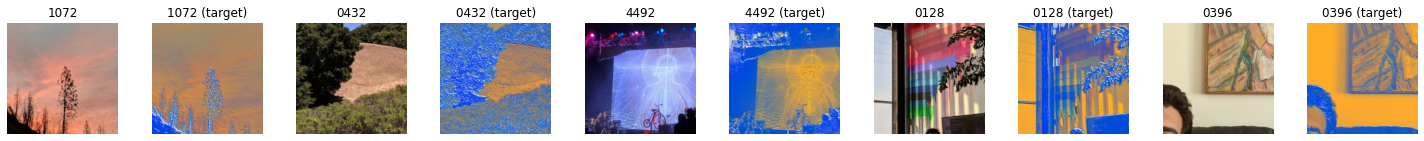

In [45]:
idx = np.random.choice(range(len(train_dataset)), 5, replace=False) 

fig, axes = plt.subplots(1, 10, figsize=(20, 8))  

for i in range(len(idx)):
    img, target, label = train_dataset[idx[i]]
    # Plot content image
    ax = plt.subplot(1, 10, 2*i + 1)
    plt.tight_layout()
    ax.set_title(label)
    ax.axis('off')
    plt.imshow(img.permute(1, 2, 0))  
    
    # Plot style image
    ax = plt.subplot(1, 10, 2*i + 2)
    plt.tight_layout()
    ax.set_title(label + " (target)")
    ax.axis('off')
    plt.imshow(target.permute(1, 2, 0)) 

plt.show()

In [47]:
from torch.nn import BCEWithLogitsLoss
import torch.optim as optim

from model import StyleTransferUNet

style_transfer_model = StyleTransferUNet().to(device)

criterion = BCEWithLogitsLoss().to(device)
optimizer = optim.Adam(style_transfer_model.parameters(), lr=1e-3)

In [50]:
# Training loop
def train_style_transfer_model(model, train_dataloader, val_dataloader, criterion, optimizer, num_epochs=20, device='cuda'):
    model.train()
    model.to(device)

    for epoch in range(num_epochs):
        total_loss = 0.0
        for i_batch, (images, targets, labels) in enumerate(train_dataloader):

            content_image = images.to(device)
            style_image = targets.to(device) 

            optimizer.zero_grad()
            generated_image = model(content_image)
            loss = criterion(generated_image, style_image)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            
        average_loss = total_loss / len(train_dataloader)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss}')

        # Validation
        model.eval()
        with torch.no_grad():
            validation_loss = 0.0
            for i_batch, (images, targets, labels) in enumerate(val_dataloader):
                content_image_val = images.to(device)
                style_image_val = targets.to(device) 
                generated_image_val = model(content_image_val)
                val_loss = criterion(generated_image_val, style_image_val)
                validation_loss += val_loss.item()

            average_validation_loss = validation_loss / len(val_dataloader)
            print(f'Validation - Epoch [{epoch + 1}/{num_epochs}], Loss: {average_validation_loss}')

    # Save the trained model
    torch.save(style_transfer_model.state_dict(), 'trained_model/style_transfer_model.pth')

In [51]:
train_style_transfer_model(style_transfer_model, train_loader, validation_loader, criterion, optimizer, num_epochs=20, device=device)

Epoch [1/20], Loss: 0.6319855323859623


python(5133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [1/20], Loss: 0.6245516339937845


python(5152) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5155) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [2/20], Loss: 0.6250741822378976


python(5241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5242) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5243) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5244) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [2/20], Loss: 0.6218514839808146


python(5255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5258) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [3/20], Loss: 0.6196466386318207


python(5292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [3/20], Loss: 0.6174289782842001


python(5312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5313) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5314) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [4/20], Loss: 0.6176297238894871


python(5344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [4/20], Loss: 0.6159802079200745


python(5353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [5/20], Loss: 0.615498389516558


python(5400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [5/20], Loss: 0.6147766709327698


python(5449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [6/20], Loss: 0.6142936646938324


python(5490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [6/20], Loss: 0.6138719518979391


python(5509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [7/20], Loss: 0.6133242292063577


python(5526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5528) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [7/20], Loss: 0.6134094595909119


python(5540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5543) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [8/20], Loss: 0.6131581621510642


python(5583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [8/20], Loss: 0.6128522356351217


python(5597) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5599) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5600) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [9/20], Loss: 0.6118857349668231


python(5660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [9/20], Loss: 0.6126703222592672


python(5675) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5676) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5677) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5678) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [10/20], Loss: 0.6121132629258292


python(5732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5734) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [10/20], Loss: 0.6124783953030905


python(5747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [11/20], Loss: 0.6120437851973942


python(5825) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [11/20], Loss: 0.6113954981168112


python(5840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [12/20], Loss: 0.6103672512939998


python(5866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [12/20], Loss: 0.6114749511082967


python(5879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [13/20], Loss: 0.609756852899279


python(5901) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5902) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5903) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [13/20], Loss: 0.610464890797933


python(5919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [14/20], Loss: 0.6096262165478298


python(6006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [14/20], Loss: 0.6100485523541769


python(6018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [15/20], Loss: 0.6110795523439135


python(6053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [15/20], Loss: 0.6100407044092814


python(6072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6073) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6074) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6075) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [16/20], Loss: 0.6102615680013385


python(6113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [16/20], Loss: 0.6098625262578329


python(6126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [17/20], Loss: 0.6097931180681501


python(6169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [17/20], Loss: 0.6096915404001871


python(6181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [18/20], Loss: 0.6092227484498706


python(6202) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6205) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [18/20], Loss: 0.6091117262840271


python(6252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [19/20], Loss: 0.6080875779901233


python(6301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6302) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6303) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [19/20], Loss: 0.6087161898612976


python(6324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch [20/20], Loss: 0.6083667320864541


python(6346) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Validation - Epoch [20/20], Loss: 0.6091040174166361


In [56]:
model = StyleTransferUNet().to(device)
model.load_state_dict(torch.load('trained_model/style_transfer_model.pth'))

# Testing
with torch.no_grad():
    test_loss = 0.0
    for i_batch, (images, targets, labels) in enumerate(test_loader):
        content_image_test = images.to(device)
        style_image_test = targets.to(device) 
        generated_image_test = model(content_image_test)
        loss = criterion(generated_image_test, style_image_test)
        test_loss += loss.item()

    average_test_loss = test_loss / len(test_loader)
    print(f'Test Loss: {average_test_loss}')


python(6720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Test Loss: 0.6074535648028055
